# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [28]:
# Import essential libraries for data manipulation and analysis


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [90]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')

In [91]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [93]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [94]:
df.describe()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
count,175777.000000,175777,175777,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,2.743726,2015-02-04 19:57:50.009631744,2015-02-04 20:44:02.190406144,35.887949,2.911752,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,21.843090
min,1.000000,2015-01-21 15:22:03,2015-01-21 16:07:03,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000
25%,2.000000,2015-01-29 01:31:19,2015-01-29 02:16:30,18.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,15.360000
50%,2.000000,2015-02-05 02:41:26,2015-02-05 03:34:33,38.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,21.760000
75%,4.000000,2015-02-12 01:04:32,2015-02-12 01:48:24,55.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,28.120000
max,6.000000,2015-02-18 06:00:44,2015-02-18 06:51:10,72.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,83.520000
std,1.330963,NaN,NaN,20.728254,1.513128,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,8.748712


In [95]:
# Convert categorical features to category type
df['market_id'].unique()
df['store_primary_category'].unique()
df['order_protocol'].unique()



array([1., 2., 3., 5., 4., 6., 7.])

In [96]:
df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [97]:
# Calculate time taken in minutes
df['time_taken_mins'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken_mins
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [98]:
# Extract the hour and day of week from the 'created_at' timestamp
# Extract hour of the day
df['created_hour'] = df['created_at'].dt.hour

# Extract day of the week (0 = Monday, 6 = Sunday)
df['created_dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
# Create a new categorical feature: isWeekend (True if Saturday or Sunday)
df['isWeekend'] = df['created_dayofweek'].apply(lambda x: 1 if(x >= 5) else 0)
df.head()


,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken_mins,created_hour,created_dayofweek,isWeekend
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1,0


In [99]:
# Drop unnecessary columns
# Columns 'min_item_price', 'max_item_price', 'created_at', 'actual_delivery_time' seems not really needed for analysis, hence dropping them 
df = df.drop(columns=['min_item_price', 'max_item_price','created_at', 'actual_delivery_time'])
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken_mins,created_hour,created_dayofweek,isWeekend
0,1.0,4,1.0,4,3441,4,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,46,2.0,1,1900,1,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,36,3.0,4,4771,3,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,38,1.0,1,1525,1,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,38,1.0,2,3620,2,5.0,5.0,7.0,8.20,46.0,2,1,0


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [100]:
# Define target variable (y) and features (X)
import sklearn
from sklearn.model_selection import train_test_split


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [101]:
# Define target variable (y) and features (X)
df_bkp = df.copy() # Just keeping a backup copy
y = df.pop('time_taken_mins')
X = df


In [102]:
X.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_hour,created_dayofweek,isWeekend
0,1.0,4,1.0,4,3441,4,33.0,14.0,21.0,34.44,22,4,0
1,2.0,46,2.0,1,1900,1,1.0,2.0,2.0,27.60,21,1,0
2,2.0,36,3.0,4,4771,3,8.0,6.0,18.0,11.56,0,0,0
3,1.0,38,1.0,1,1525,1,5.0,6.0,8.0,31.80,3,3,0
4,1.0,38,1.0,2,3620,2,5.0,5.0,7.0,8.20,2,1,0


In [103]:
# Split data into training and testing sets

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [104]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140621, 13)
(140621,)
(35156, 13)
(35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [105]:
# Define numerical and categorical columns for easy EDA and data manipulation

# 7 numberical, 6 Categorical
numeric_cols = ['subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance','total_items']
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'created_hour', 'created_dayofweek', 'isWeekend']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

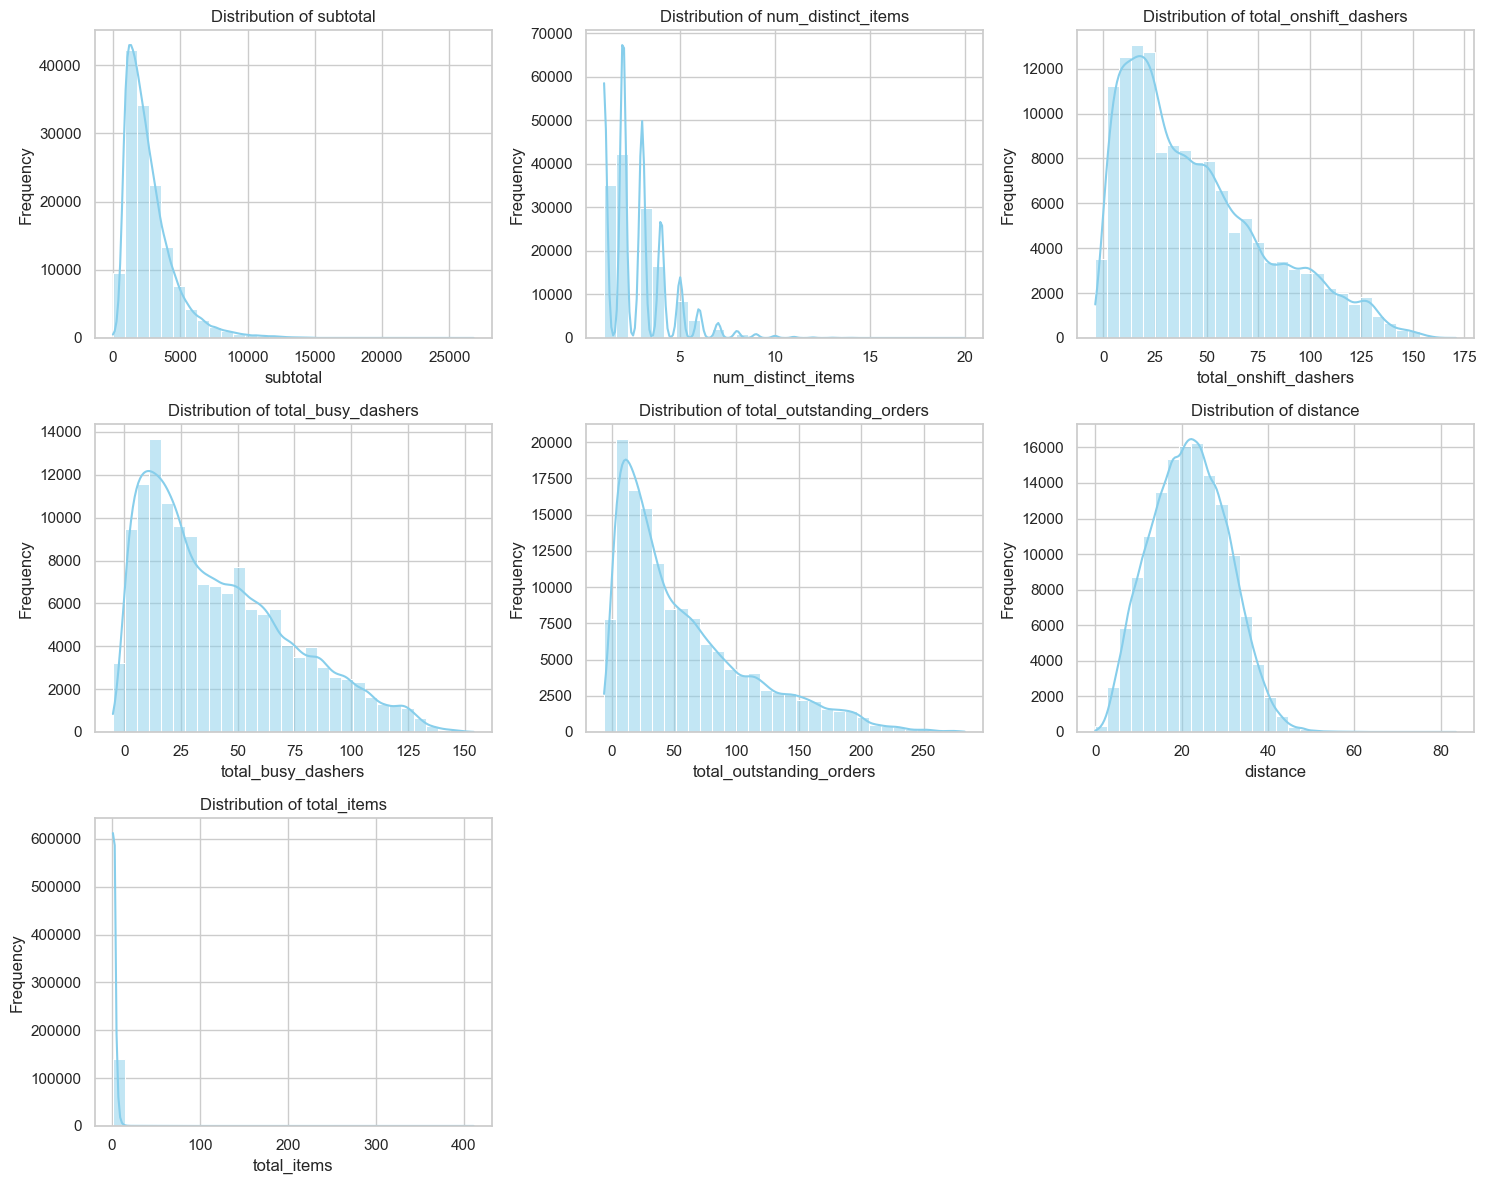

In [106]:
# Plot distributions for all numerical columns
# Set plot style
sns.set(style="whitegrid")

# Set number of columns for subplot grid
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)

# Create subplots
plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(X_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

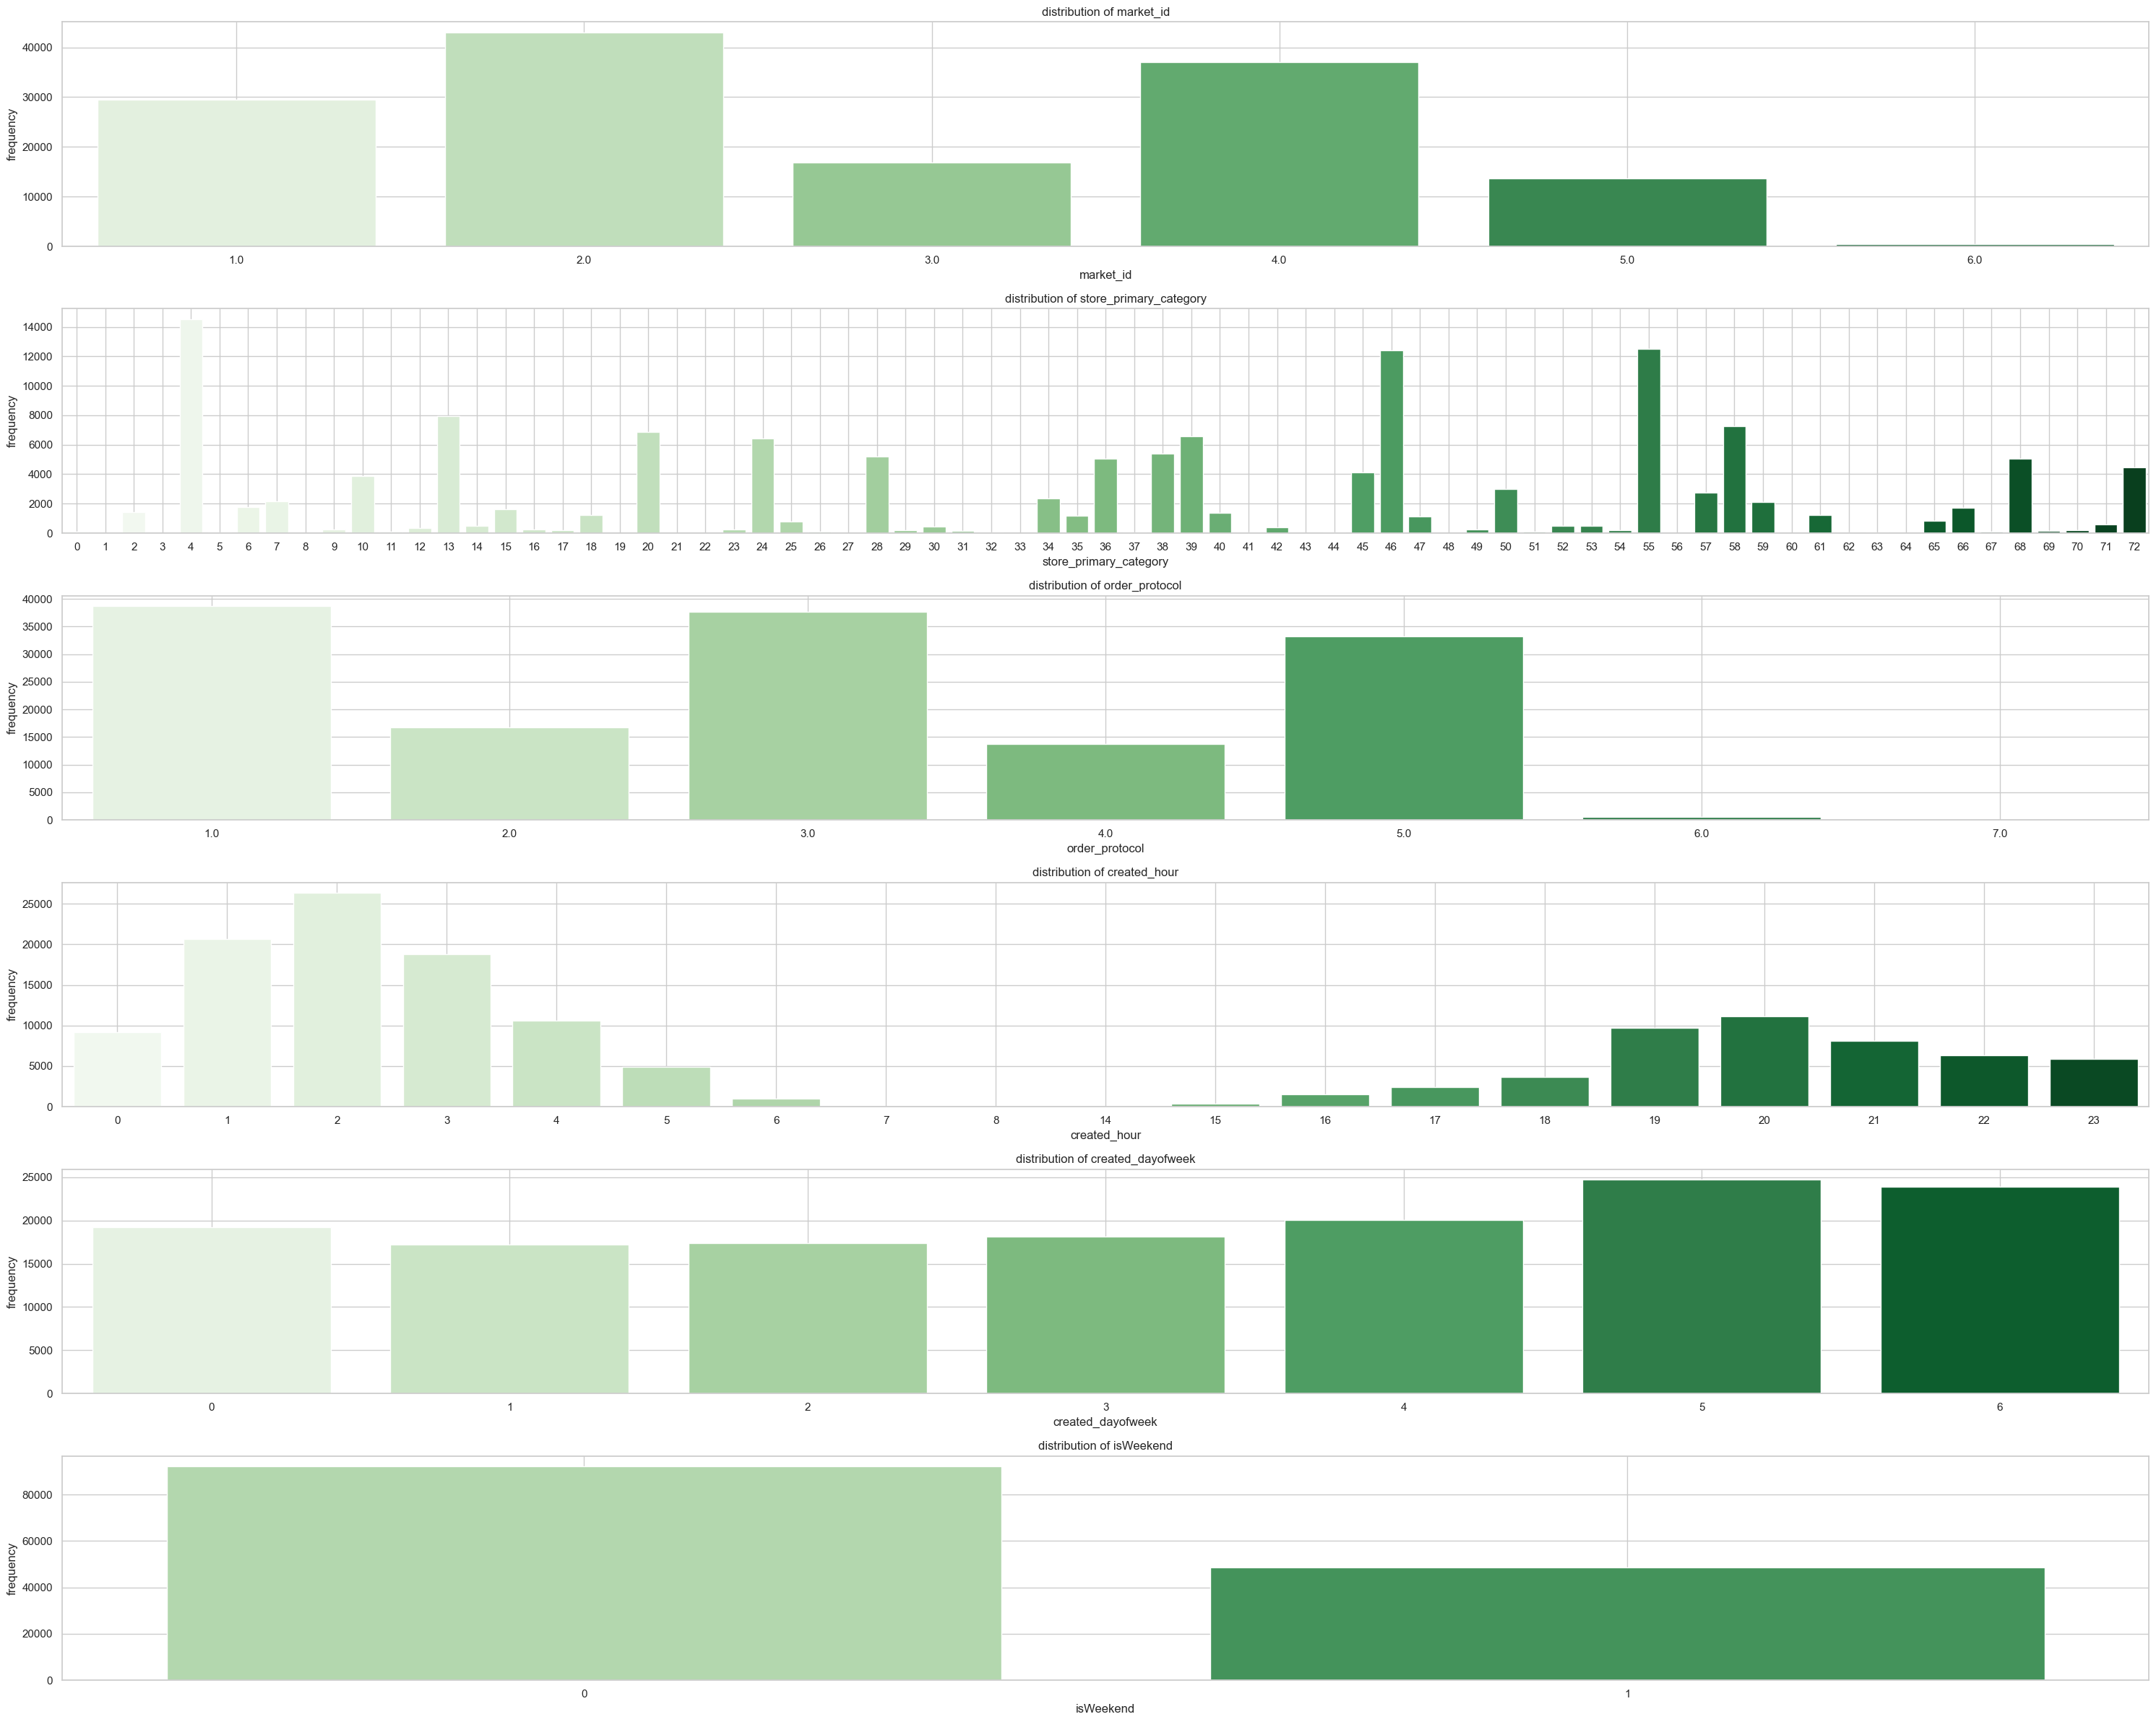

In [107]:
# Distribution of categorical columns

# Define subplot grid
n_cols = 1
n_rows = 6

plt.figure(figsize=(30, 4 * n_rows))
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=X_train, x=col, palette='Greens')
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

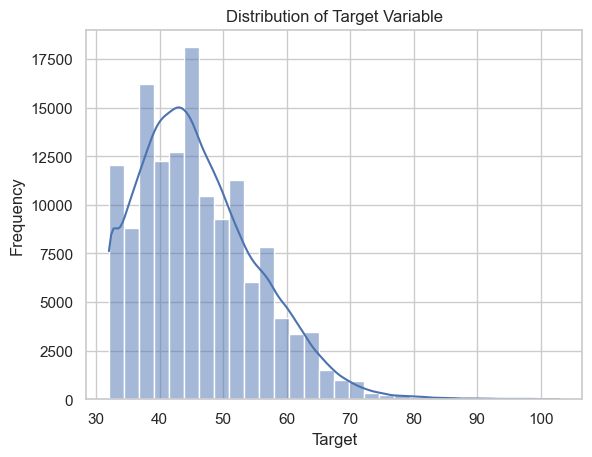

In [108]:
# Distribution of time_taken

sns.histplot(y_train,kde=True, bins = 30)
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

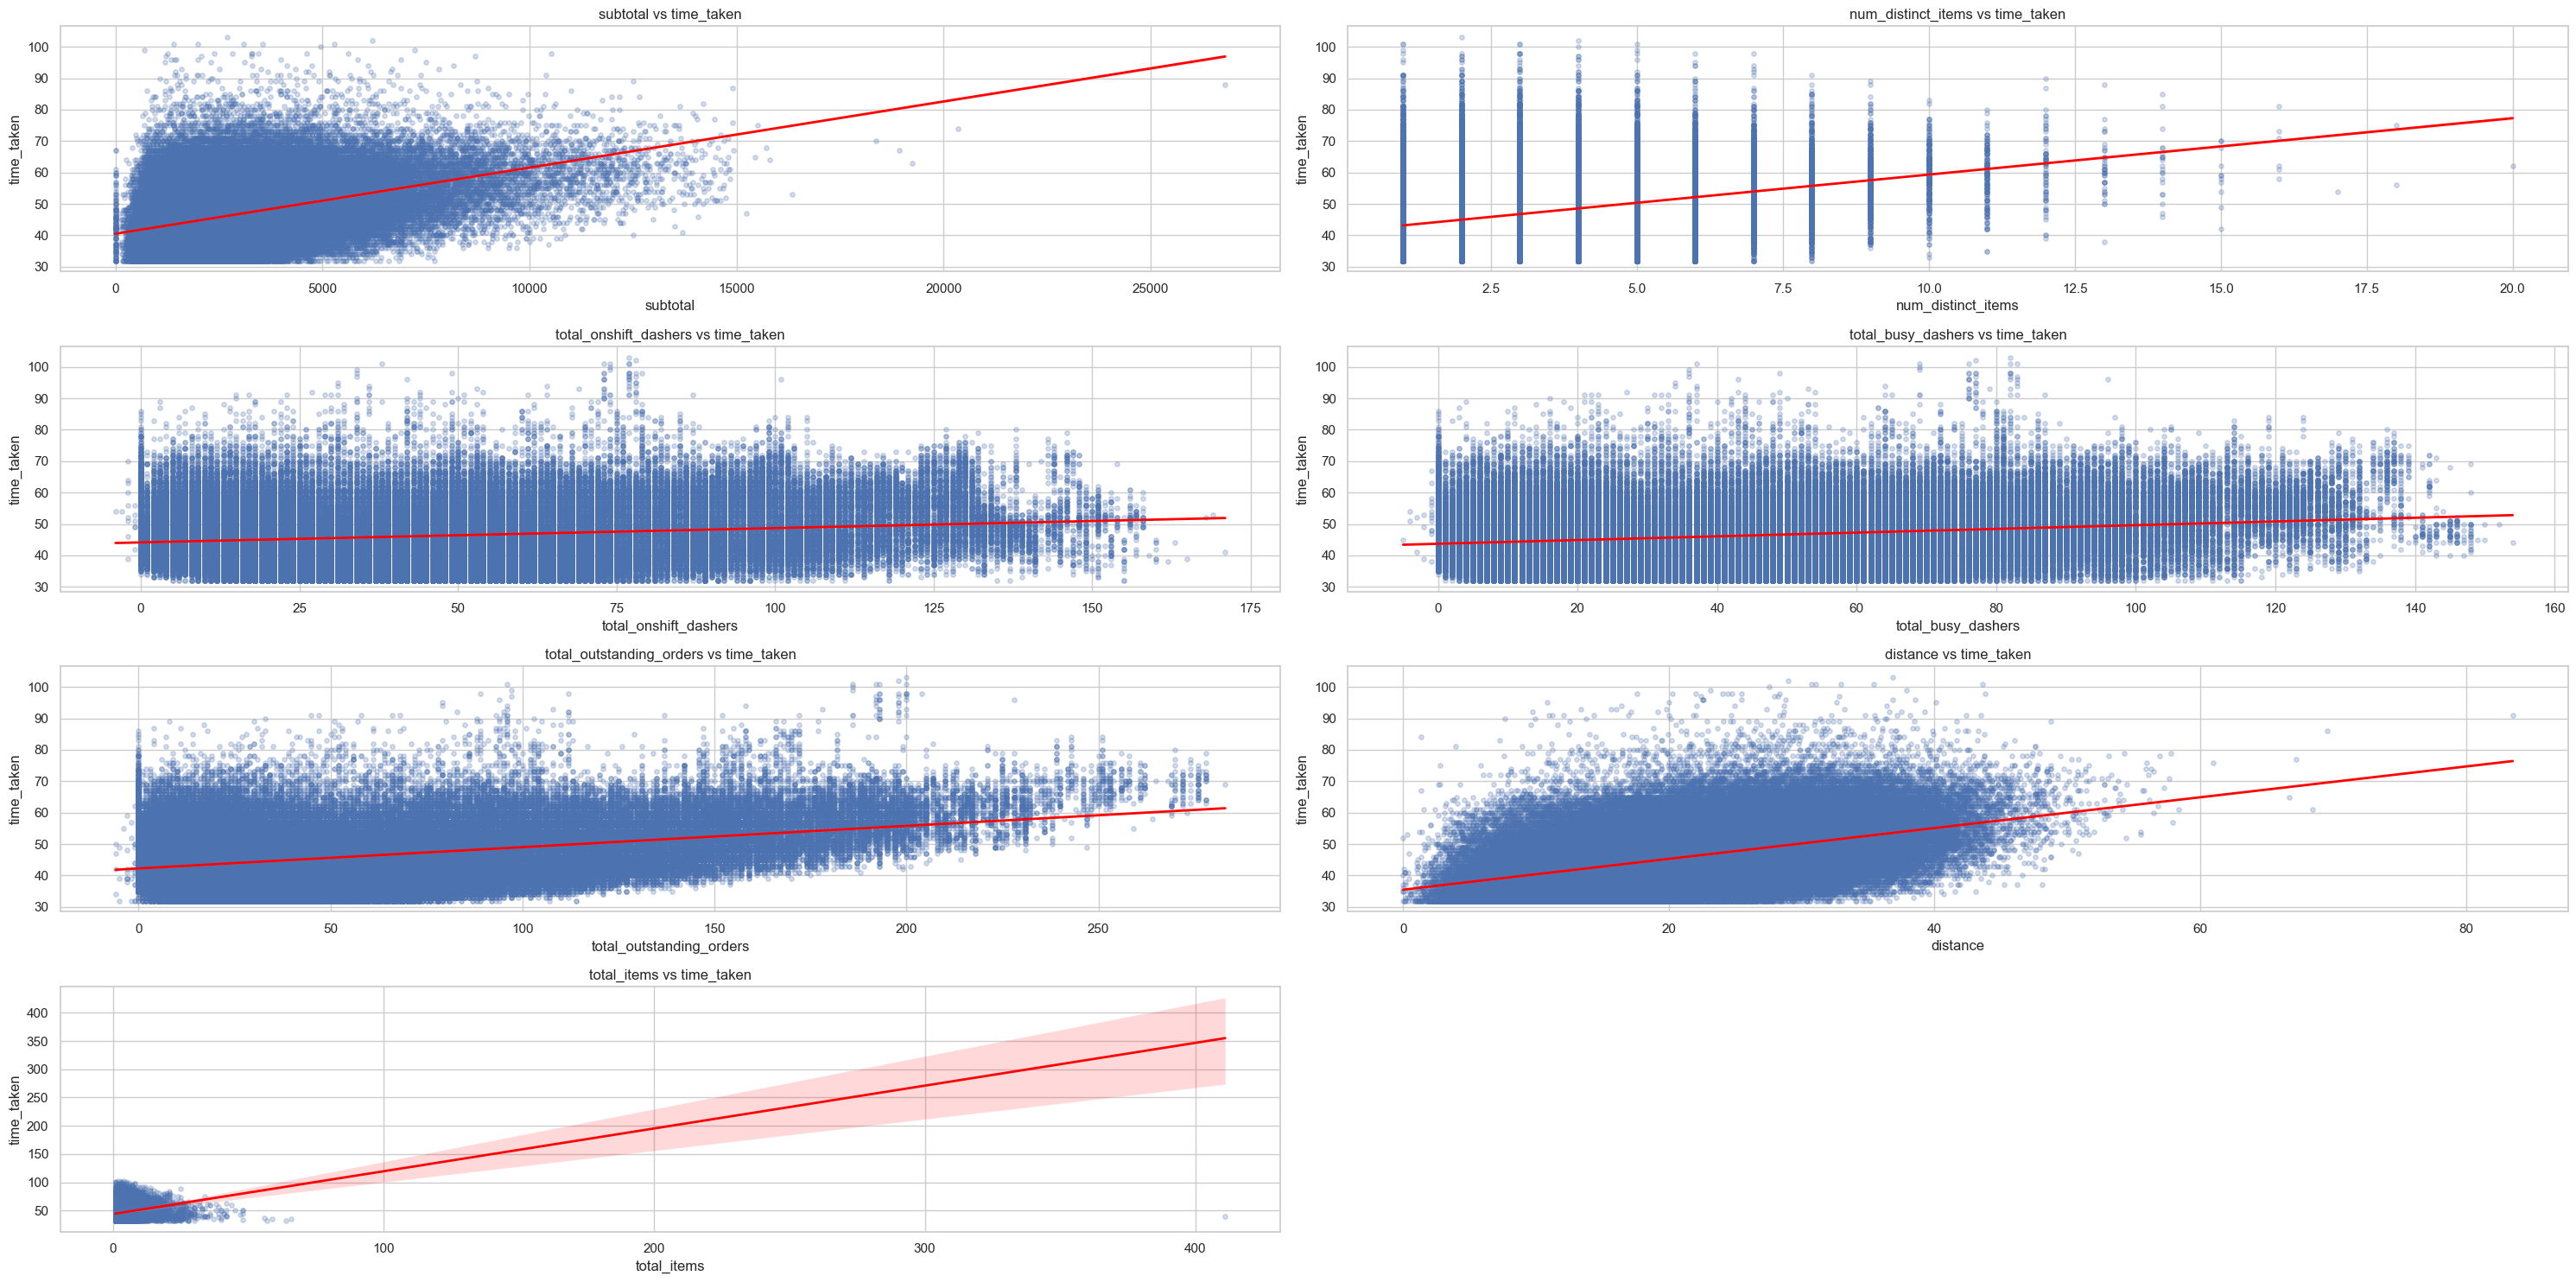

In [109]:
# Scatter plot to visualise the relationship between time_taken and other features

# for numerical variables
plt.figure(figsize = (30,15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4,2,i)    
    sns.regplot(x = X_train[col], y = y_train, scatter_kws = {'alpha': 0.25, 's': 15},
               line_kws={'color': 'red', 'linewidth': 2})
    plt.title(f'{col} vs time_taken')
    plt.xlabel(col)
    plt.ylabel('time_taken')
plt.tight_layout()
plt.show()

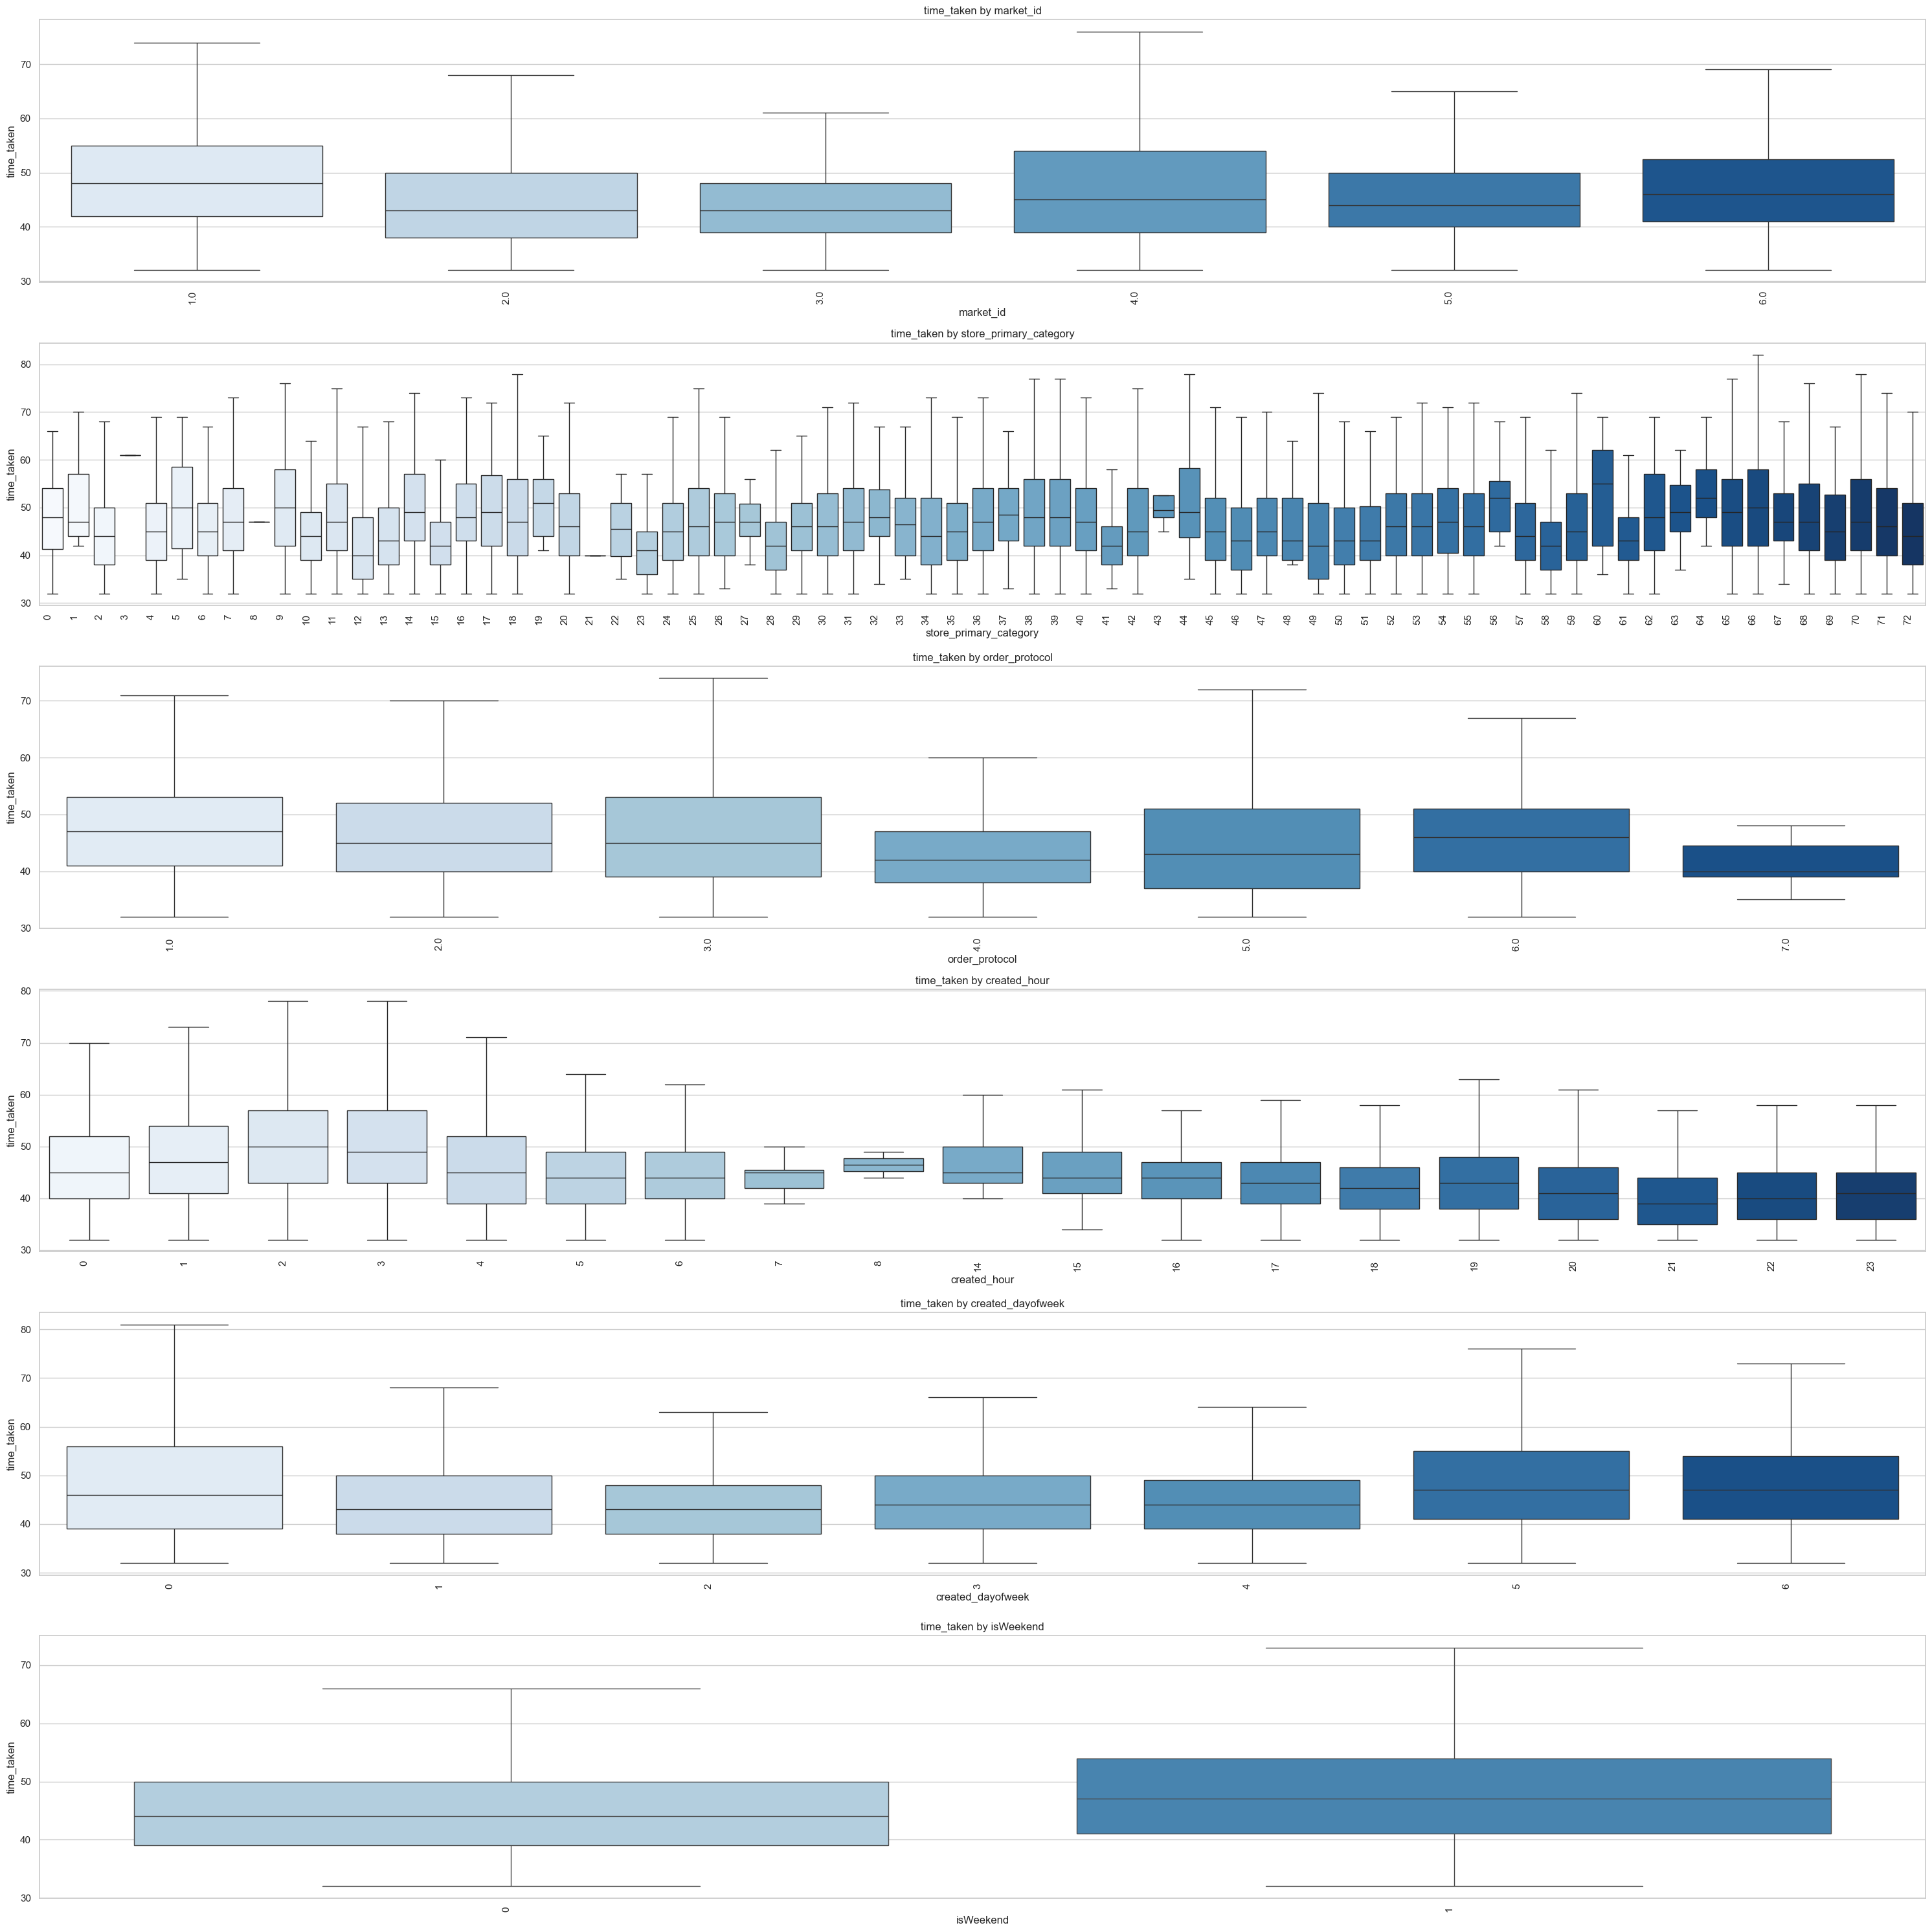

In [110]:
# for categorical variables
plt.figure(figsize=(30, 30))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 1, i)
    sns.boxplot(x=X_train[col], y=y_train, showfliers=False, palette='Blues')   # do not display outliers 
    plt.title(f'time_taken by {col}')
    plt.xlabel(col)
    plt.ylabel('time_taken')
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

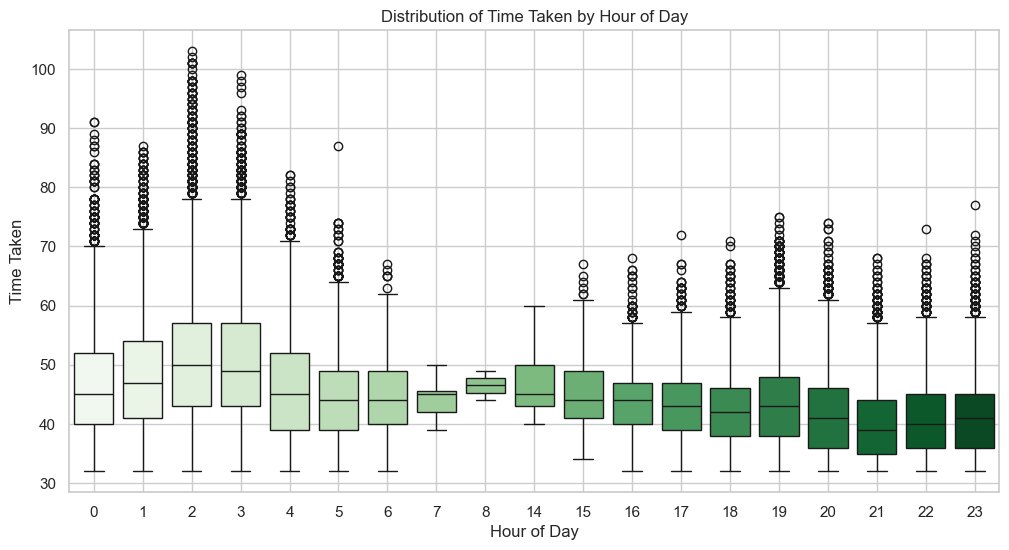

In [111]:
# Show the distribution of time_taken for different hours
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train.created_hour, y=y_train,palette='Greens')
plt.title("Distribution of Time Taken by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Time Taken")
plt.grid(True)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [112]:
# Plot the heatmap of the correlation matrix
# Plot the heatmap of the correlation matrix
# Need a create a common data frame with X and y
combined_train_df = X_train.copy()
combined_train_df['delivery_time_mins']=y_train
combined_train_df.head()


,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_hour,created_dayofweek,isWeekend,delivery_time_mins
42111,3.0,7,2.0,1,1350,1,23.0,20.0,19.0,9.60,20,0,0,32.0
58452,2.0,46,5.0,5,4285,5,112.0,100.0,207.0,34.56,2,5,1,71.0
20644,4.0,45,2.0,6,7880,3,80.0,79.0,115.0,34.92,3,4,0,62.0
79735,4.0,45,2.0,3,3660,3,127.0,106.0,173.0,25.76,2,5,1,54.0
167933,1.0,4,5.0,5,8575,5,44.0,44.0,61.0,17.72,2,3,0,56.0


In [113]:
combined_train_df.corr()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_hour,created_dayofweek,isWeekend,delivery_time_mins
market_id,1.000000,0.032329,-0.014306,0.000403,-0.002165,0.013225,0.072588,0.063226,0.066677,0.020179,-0.005583,-0.001097,-0.000617,-0.073493
store_primary_category,0.032329,1.000000,0.088484,-0.004531,0.041549,0.003257,0.082609,0.082702,0.082146,-0.000108,-0.033568,-0.015274,-0.016315,0.027266
order_protocol,-0.014306,0.088484,1.000000,0.006770,-0.052830,-0.025620,0.147403,0.152354,0.137317,-0.011027,0.013057,-0.000350,-0.000396,-0.137509
total_items,0.000403,-0.004531,0.006770,1.000000,0.544547,0.746195,0.032294,0.029326,0.035360,0.005035,-0.069095,0.021379,0.029538,0.220891
subtotal,-0.002165,0.041549,-0.052830,0.544547,1.000000,0.680228,0.129657,0.124821,0.129724,0.035828,-0.188853,0.032005,0.048449,0.413293
num_distinct_items,0.013225,0.003257,-0.025620,0.746195,0.680228,1.000000,0.066053,0.060460,0.068617,0.023726,-0.117625,0.030143,0.043765,0.312917
total_onshift_dashers,0.072588,0.082609,0.147403,0.032294,0.129657,0.066053,1.000000,0.943791,0.935929,0.043458,-0.375135,0.102944,0.089743,0.168299
total_busy_dashers,0.063226,0.082702,0.152354,0.029326,0.124821,0.060460,0.943791,1.000000,0.933204,0.042415,-0.350553,0.086263,0.108781,0.203979
total_outstanding_orders,0.066677,0.082146,0.137317,0.035360,0.129724,0.068617,0.935929,0.933204,1.000000,0.037662,-0.362471,0.087144,0.115101,0.382738
distance,0.020179,-0.000108,-0.011027,0.005035,0.035828,0.023726,0.043458,0.042415,0.037662,1.000000,-0.023101,0.008991,0.008679,0.460237


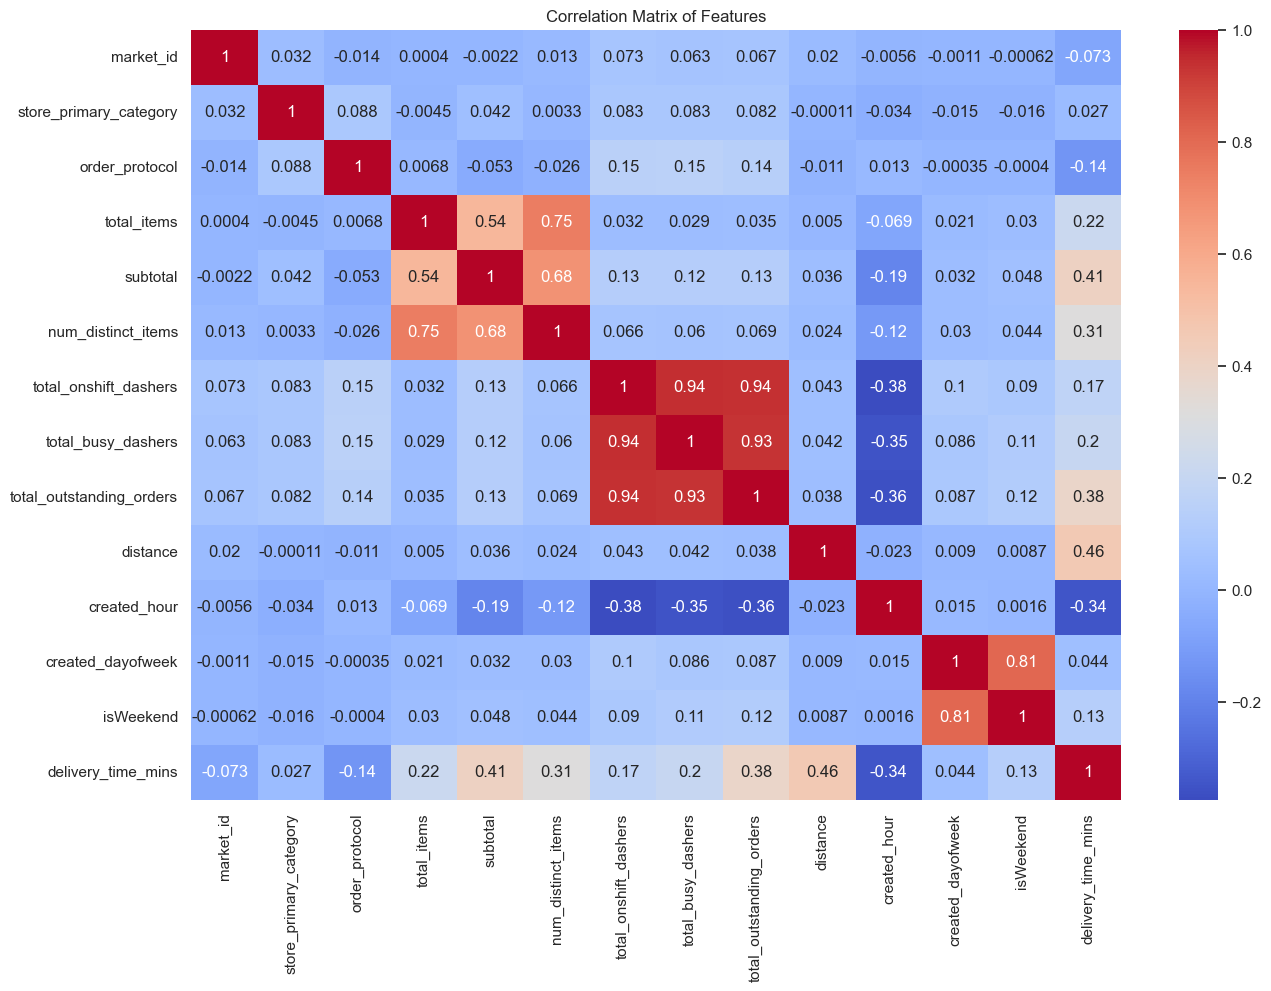

In [114]:
plt.figure(figsize=(15, 10))
sns.heatmap(combined_train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [115]:
# Drop 3-5 weakly correlated columns from training dataset
weak_columns = ['created_dayofweek','store_primary_category','market_id','order_protocol']

X_train = X_train.drop(columns = weak_columns)
X_train.shape


(140621, 9)

In [116]:
X_train[numeric_cols].head()

,subtotal,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,total_items
42111,1350,1,23.0,20.0,19.0,9.60,1
58452,4285,5,112.0,100.0,207.0,34.56,5
20644,7880,3,80.0,79.0,115.0,34.92,6
79735,3660,3,127.0,106.0,173.0,25.76,3
167933,8575,5,44.0,44.0,61.0,17.72,5


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

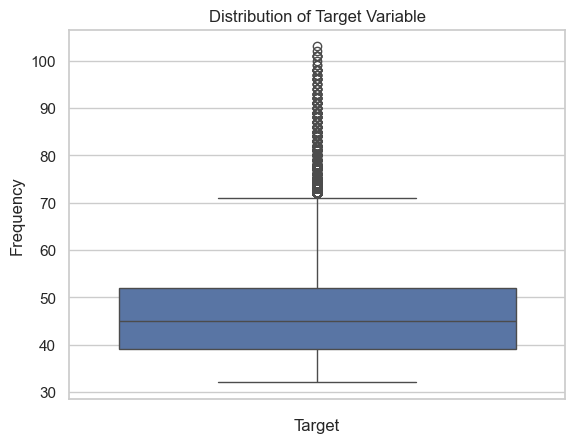

In [117]:
# Boxplot for time_taken

sns.boxplot(y_train)
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

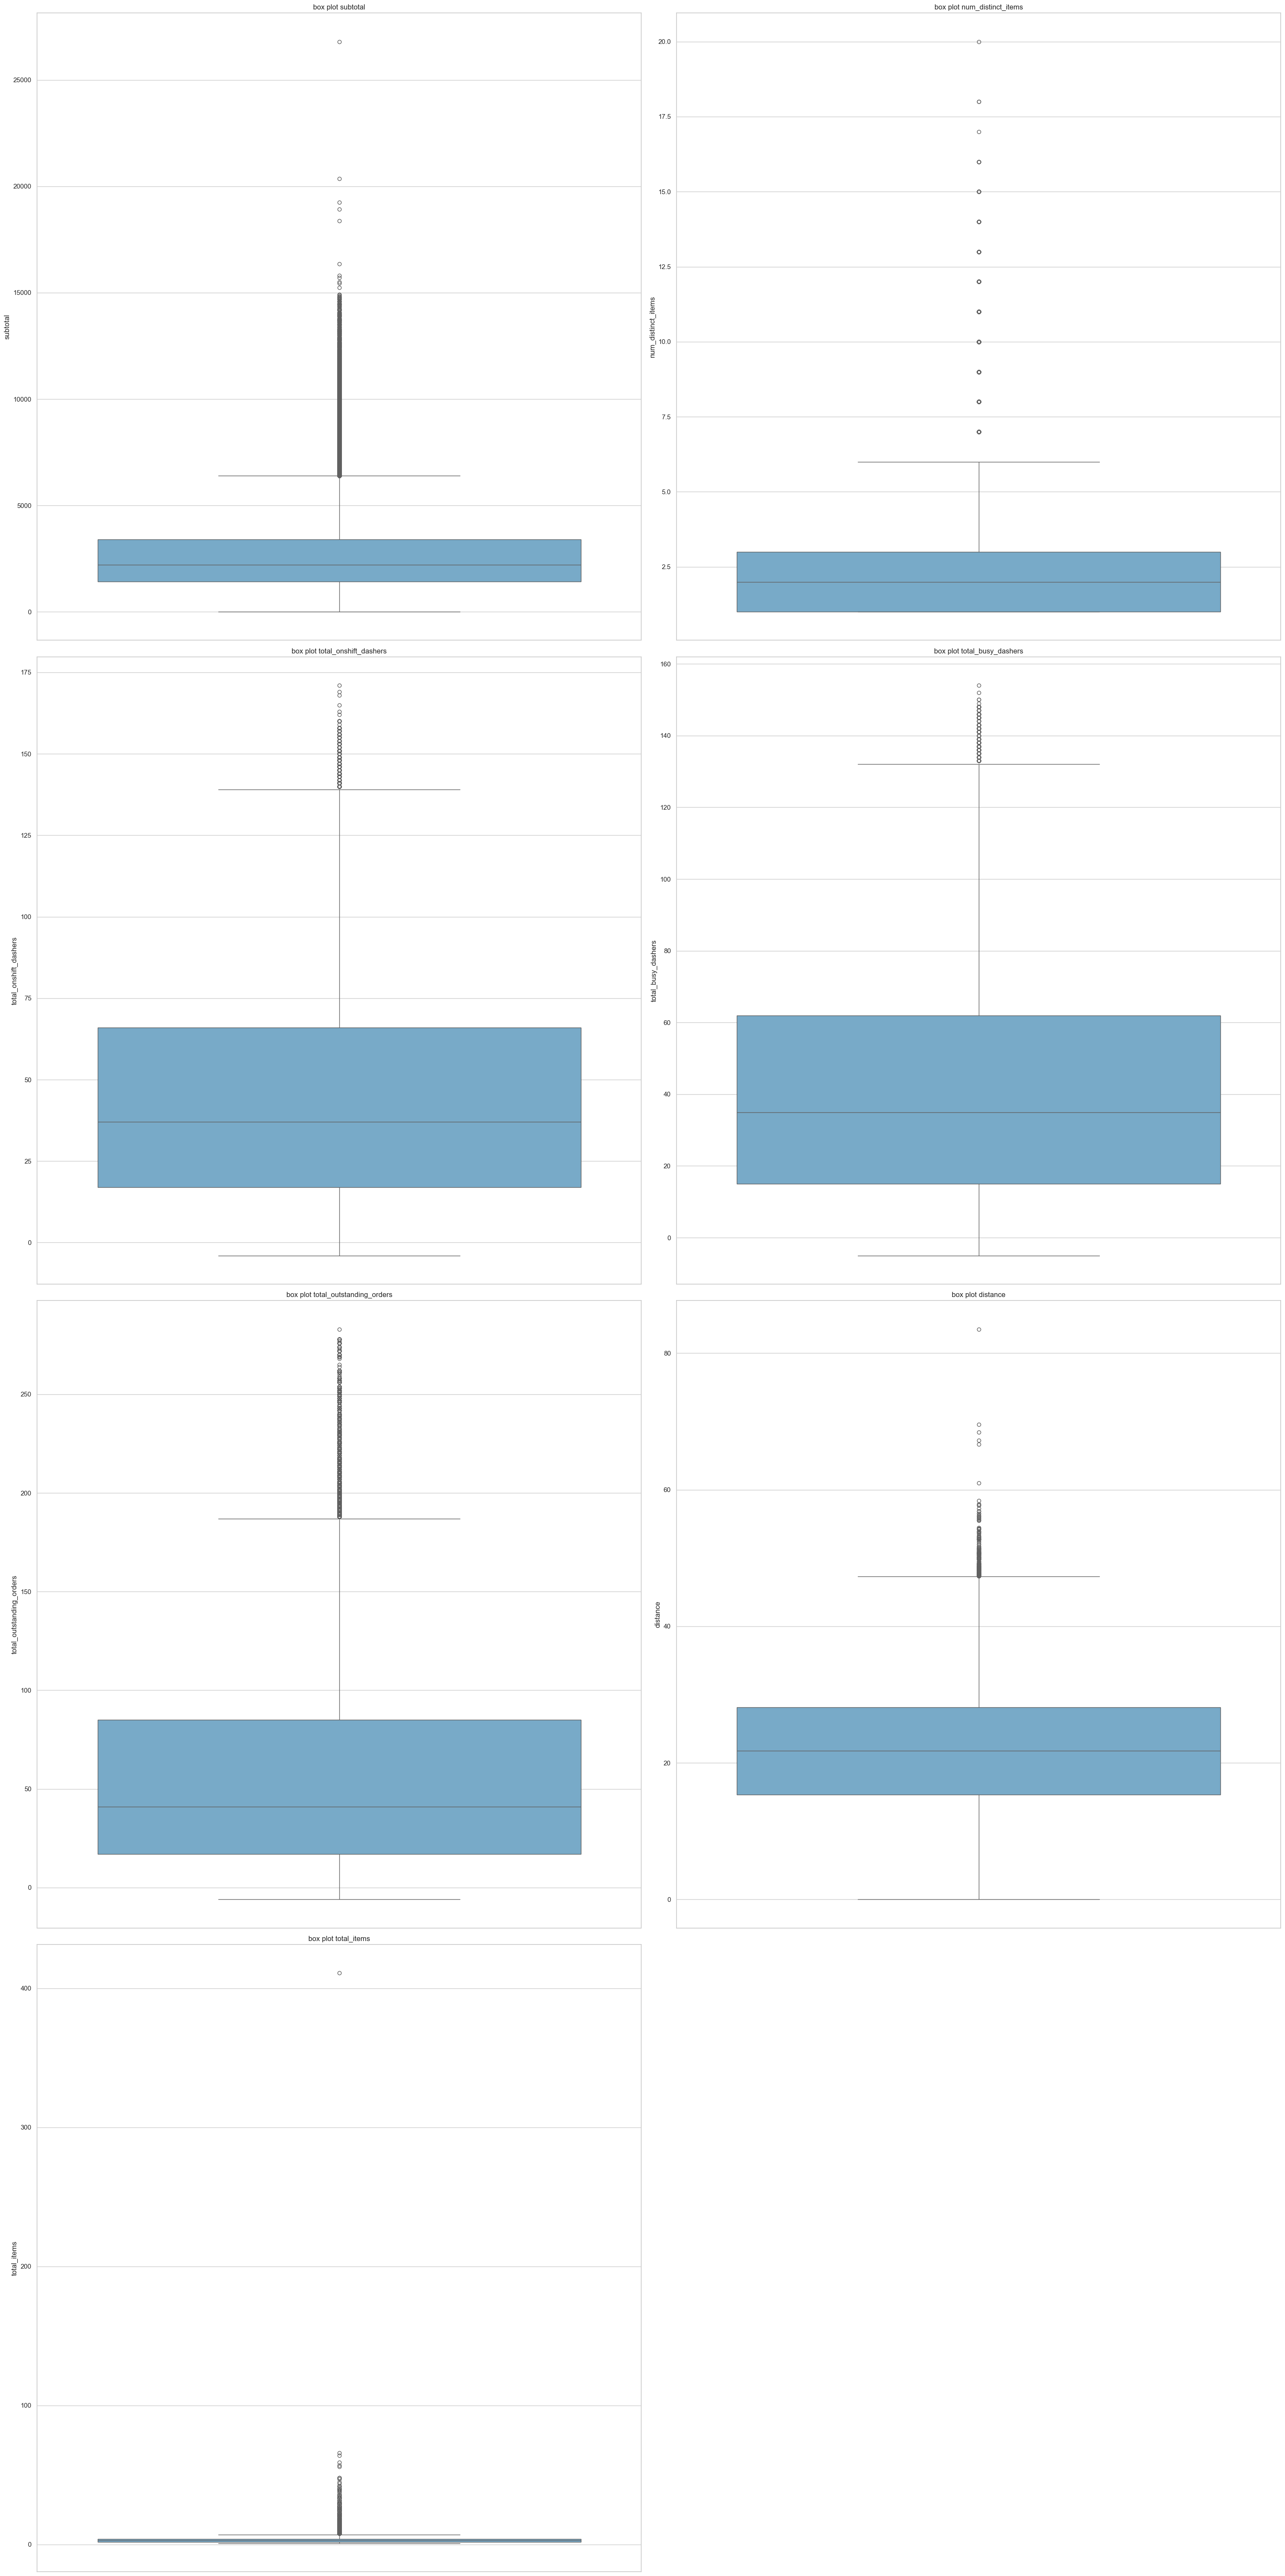

In [118]:
# Handle outliers
plt.figure(figsize=(30, 60))
for i, col in enumerate(X_train[numeric_cols].columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(X_train[col], palette='Blues')
    plt.title(f'box plot {col}')    
    plt.ylabel(col)
plt.tight_layout()
plt.show()


In [119]:
# WE need to make sure rows are removed from X_train and y_train both, else shape will not match

train_temp = X_train.copy()
train_temp['delivery_time_mins']=y_train

for col in train_temp[numeric_cols].columns:
    upper_limit = train_temp[col].quantile(0.99)
    train_temp = train_temp[train_temp[col] <= upper_limit]

In [120]:
y_train = train_temp.pop('delivery_time_mins')
X_train = train_temp
print(y_train.shape)
print(X_train.shape)

(132335,)
(132335, 9)


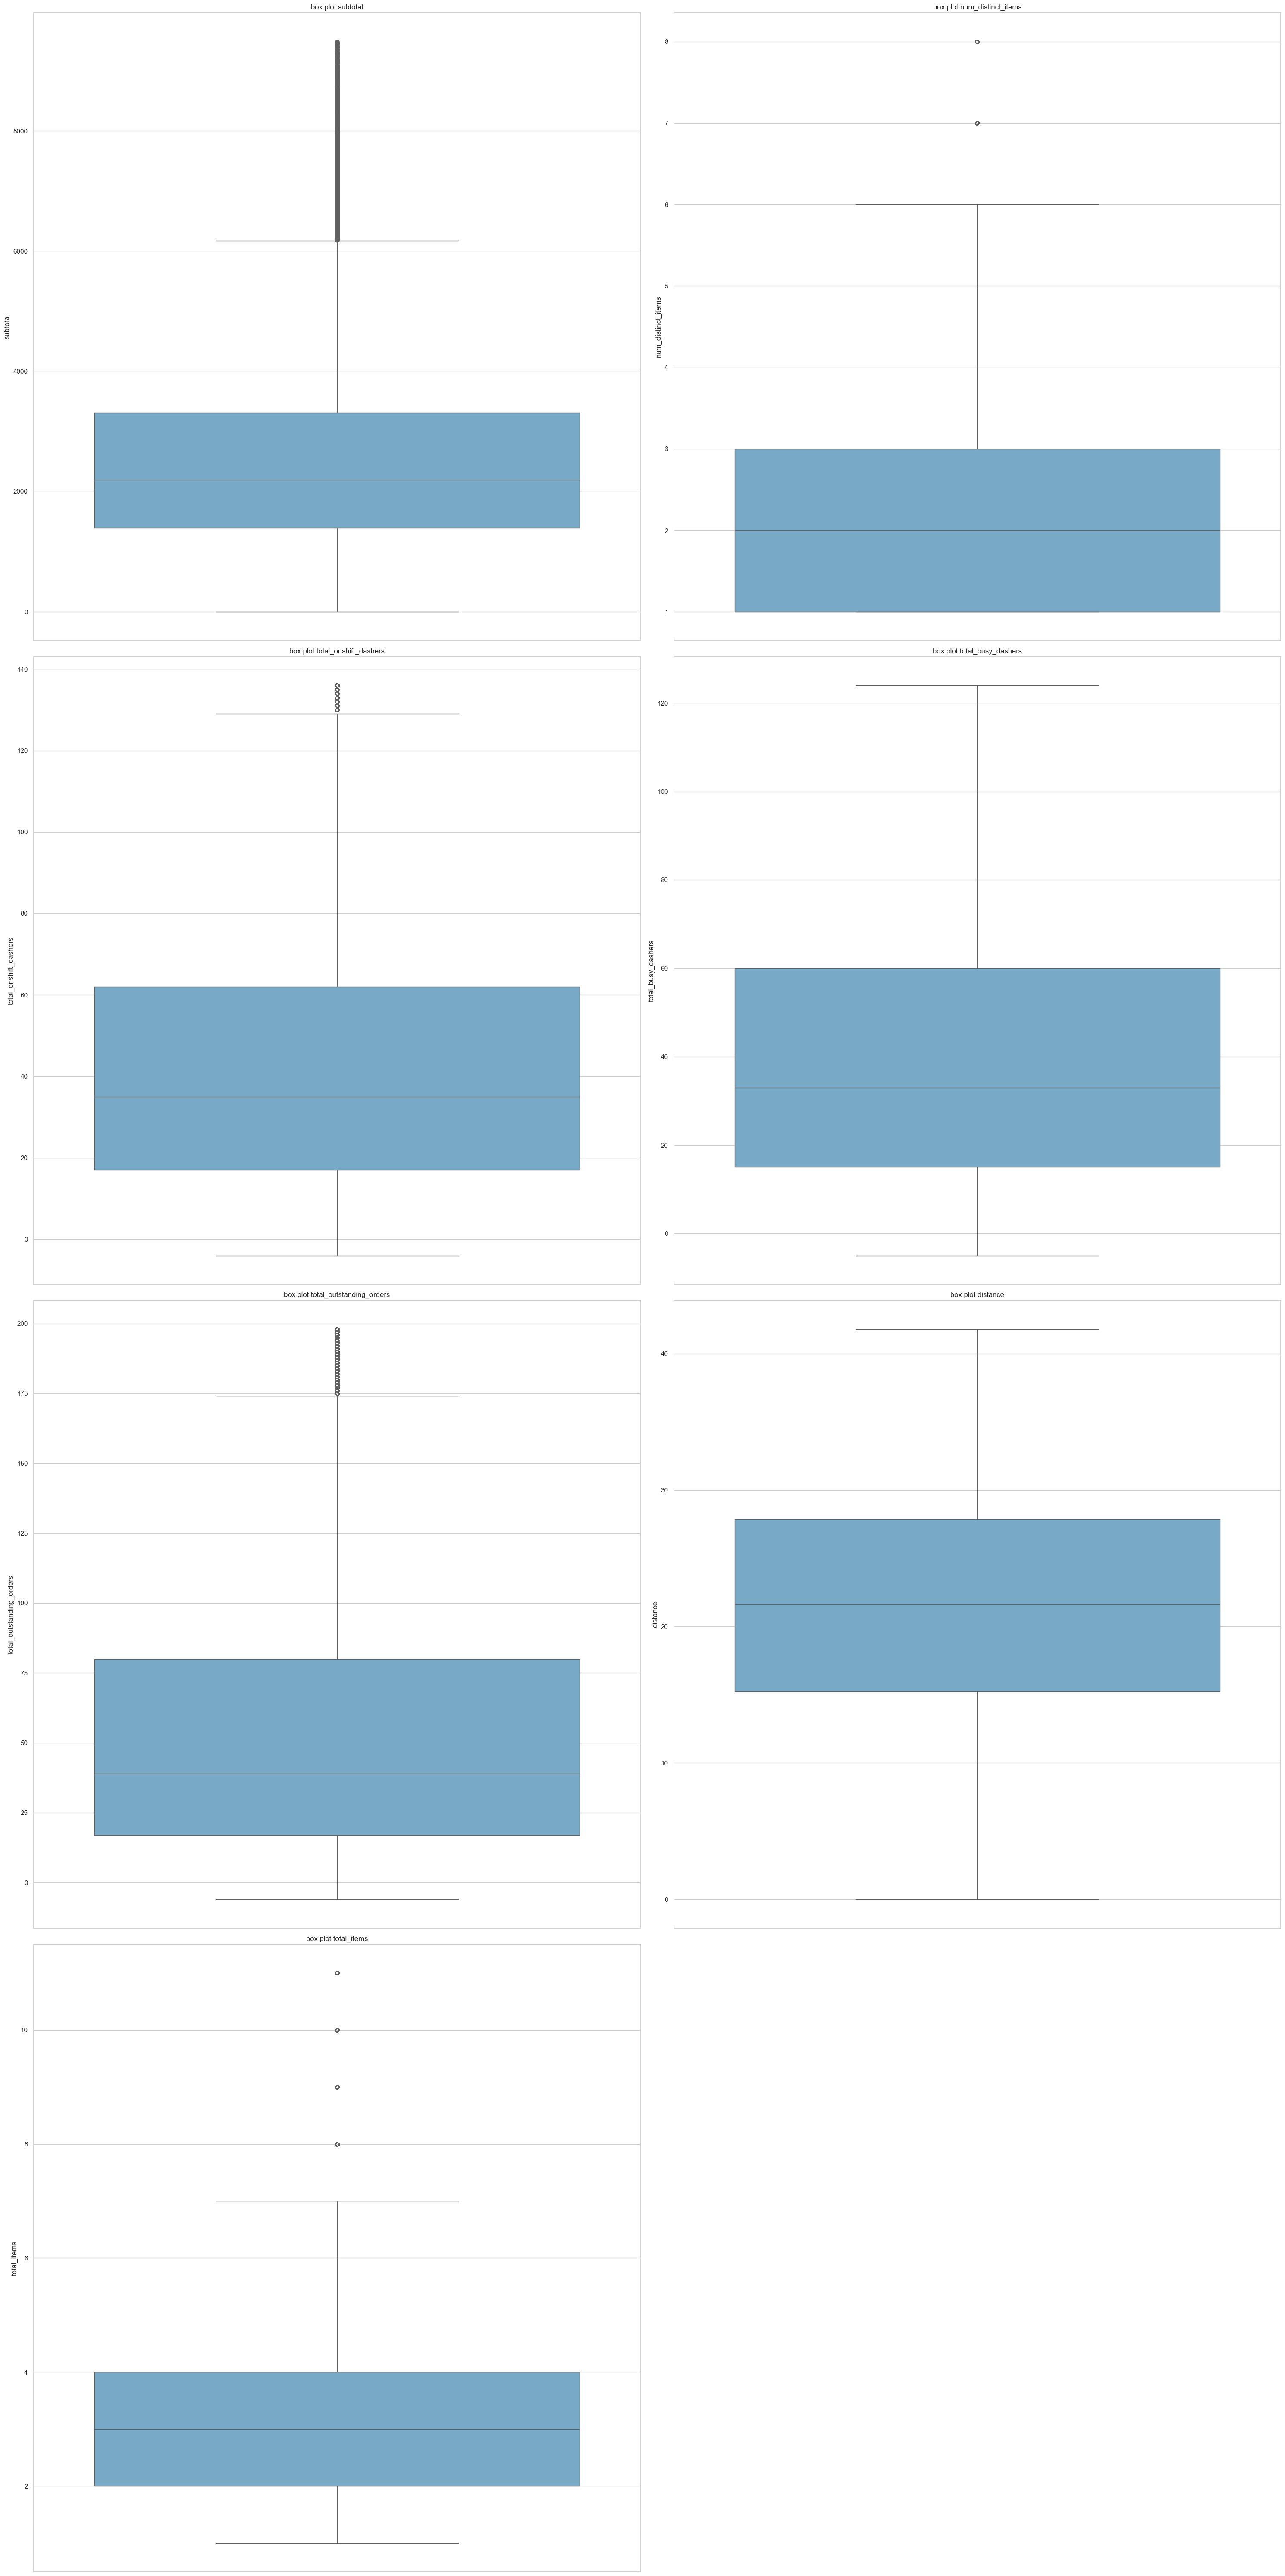

In [121]:

plt.figure(figsize=(30, 60))
for i, col in enumerate(X_train[numeric_cols].columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(X_train[col], palette='Blues')
    plt.title(f'box plot {col}')    
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [122]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [123]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [124]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [125]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [126]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [127]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [128]:
# Import libraries
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [129]:
angle_train = 2 * np.pi * X_train['created_hour'] / 24
X_train['hour_sin'] = np.sin(angle_train)
X_train['hour_cos'] = np.cos(angle_train)

X_train.drop(columns=['created_hour'], inplace=True)
X_train.head()

,total_items,subtotal,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,isWeekend,hour_sin,hour_cos
42111,1,1350,1,23.0,20.0,19.0,9.60,0,-0.866025,0.500000
20644,6,7880,3,80.0,79.0,115.0,34.92,0,0.707107,0.707107
79735,3,3660,3,127.0,106.0,173.0,25.76,1,0.500000,0.866025
167933,5,8575,5,44.0,44.0,61.0,17.72,0,0.500000,0.866025
80691,4,546,4,1.0,1.0,0.0,25.80,0,-0.500000,-0.866025


In [130]:
numeric_cols.extend(['hour_sin','hour_cos'])

In [131]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_train.head()

,total_items,subtotal,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,isWeekend,hour_sin,hour_cos
42111,0.0,0.142315,0.000000,0.192857,0.193798,0.122549,0.229665,0,0.066987,0.732051
20644,0.5,0.830698,0.285714,0.600000,0.651163,0.593137,0.835407,0,0.853553,0.843039
79735,0.2,0.385832,0.285714,0.935714,0.860465,0.877451,0.616268,1,0.750000,0.928203
167933,0.4,0.903964,0.571429,0.342857,0.379845,0.328431,0.423923,0,0.750000,0.928203
80691,0.3,0.057559,0.428571,0.035714,0.046512,0.029412,0.617225,0,0.250000,0.000000


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [132]:
# Create/Initialise the model
lr = LinearRegression()

In [133]:
y_train_lm = y_train.values.reshape(-1,1)
y_train_lm.shape

(132335, 1)

In [134]:
# Train the model using the training data
lr.fit(X_train, y_train_lm)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [135]:
# Make predictions
y_train_pred = lr.predict(X_train)

In [136]:
# Find results for evaluation metrics
print('Accuracy on training set',lr.score(X_train,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train,y_train_pred))
print('Relative Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('R2 Score:', metrics.r2_score(y_train,y_train_pred))


Accuracy on training set 0.8421876730982705
Mean Absolute Error: 2.6115696975586626
Relative Mean Squared Error: 3.5374665291792313
R2 Score: 0.8421876730982705


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [137]:
# Create/Initialise the model
lr = LinearRegression()

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     delivery_time_mins   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 7.062e+04
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:13:19   Log-Likelihood:            -3.5497e+05
No. Observations:              132335   AIC:                         7.100e+05
Df Residuals:                  132324   BIC:                         7.101e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [138]:
# Loop through the number of features and test the model

# Tried removing few other variables, however R-squared was impacted significantly. Only total_items have no impact
# Remove total_items

X_train_1 = X_train.drop(columns = ['total_items'])
print(X_train_1.shape)
print(X_train.shape)


(132335, 9)
(132335, 10)


In [139]:
# Build the final model with selected number of features
# Create/Initialise the model
lr = LinearRegression()

# Add a constant
X_train_lm_1 = sm.add_constant(X_train_1)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm_1).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:     delivery_time_mins   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 7.815e+04
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:13:21   Log-Likelihood:            -3.5519e+05
No. Observations:              132335   AIC:                         7.104e+05
Df Residuals:                  132325   BIC:                         7.105e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [140]:
y_train_pred = lr.predict(X_train_lm_1)

# Find results for evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train,y_train_pred))
print('Relative Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('R2 Score:', metrics.r2_score(y_train,y_train_pred))

Mean Absolute Error: 2.61651294454704
Relative Mean Squared Error: 3.543350701620939
R2 Score: 0.8416622308117161


In [141]:
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant if needed
from statsmodels.tools.tools import add_constant
X = add_constant(X_train)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                     Feature        VIF
0                      const  30.374366
1                total_items   4.558809
2                   subtotal   1.875403
3         num_distinct_items   4.662112
4      total_onshift_dashers  11.914401
5         total_busy_dashers  11.070295
6   total_outstanding_orders   9.604601
7                   distance   1.003642
8                  isWeekend   1.011044
9                   hour_sin   1.264211
10                  hour_cos   1.235154


In [142]:
# total_busy_dashers removed due to multicollinearity 
X_train_2 = X_train.drop(columns = ['total_items','total_busy_dashers'])
print(X_train_2.shape)
print(X_train.shape)

# Create/Initialise the model
lr = LinearRegression()

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_2)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm_2).fit()
print(lr.summary())

(132335, 8)
(132335, 10)
                            OLS Regression Results                            
Dep. Variable:     delivery_time_mins   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 7.423e+04
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:13:26   Log-Likelihood:            -3.6449e+05
No. Observations:              132335   AIC:                         7.290e+05
Df Residuals:                  132326   BIC:                         7.291e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [143]:
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant if needed
from statsmodels.tools.tools import add_constant
X = add_constant(X_train_2)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                    Feature        VIF
0                     const  30.022011
1                  subtotal   1.803487
2        num_distinct_items   1.738811
3     total_onshift_dashers   8.088628
4  total_outstanding_orders   7.987482
5                  distance   1.003488
6                 isWeekend   1.008033
7                  hour_sin   1.262898
8                  hour_cos   1.233861


In [144]:
# Make predictions
y_train_pred = lr.predict(X_train_lm_2)

# Find results for evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train,y_train_pred))
print('Relative Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('R2 Score:', metrics.r2_score(y_train,y_train_pred))

Mean Absolute Error: 2.8045701117028248
Relative Mean Squared Error: 3.80135354018168
R2 Score: 0.8177645893500286


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [145]:
# Prepare Test Data
angle_test = 2 * np.pi * X_test['created_hour'] / 24
X_test['hour_sin'] = np.sin(angle_test)
X_test['hour_cos'] = np.cos(angle_test)

X_test.drop(columns=['created_hour'], inplace=True)

X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_test.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_dayofweek,isWeekend,hour_sin,hour_cos
139667,1.0,45,1.0,0.2,0.136517,0.142857,0.450000,0.496124,0.328431,0.491866,4,0,0.853553,0.843039
80077,1.0,4,1.0,0.1,0.310985,0.000000,0.157143,0.170543,0.107843,0.307177,5,1,0.629410,0.981740
41872,1.0,46,4.0,0.0,0.147059,0.000000,0.228571,0.248062,0.250000,0.401914,3,0,0.853553,0.843039
165269,4.0,24,5.0,0.1,0.312777,0.142857,0.914286,1.023256,1.009804,0.454545,5,1,0.853553,0.843039
151215,4.0,6,2.0,0.2,0.131773,0.142857,0.307143,0.271318,0.191176,0.639234,5,1,0.250000,0.928203


In [146]:
final_col = ['subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_outstanding_orders', 'distance', 'isWeekend','hour_sin', 'hour_cos']
X_train_final = X_train[final_col]
X_test_final = X_test[final_col]

# Make Prediction (train)
X_train_final_lm = sm.add_constant(X_train_final)
y_train_pred = lr.predict(X_train_final_lm)

# results for evaluation metrics (Train)
print("Train MAE :", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train R²  :", r2_score(y_train, y_train_pred))

# Make Prediction (test)
X_test_final_lm = sm.add_constant(X_test_final)
y_test_pred = lr.predict(X_test_final_lm)

# results for evaluation metrics (Test)
print("Test  MAE :", mean_absolute_error(y_test,  y_test_pred))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test,  y_test_pred)))
print("Test  R²  :", r2_score(y_test,  y_test_pred))

Train MAE : 2.8045701117028248
Train RMSE: 3.80135354018168
Train R²  : 0.8177645893500286
Test  MAE : 2.8713995533603343
Test  RMSE: 3.924211652597057
Test  R²  : 0.8235515909439403


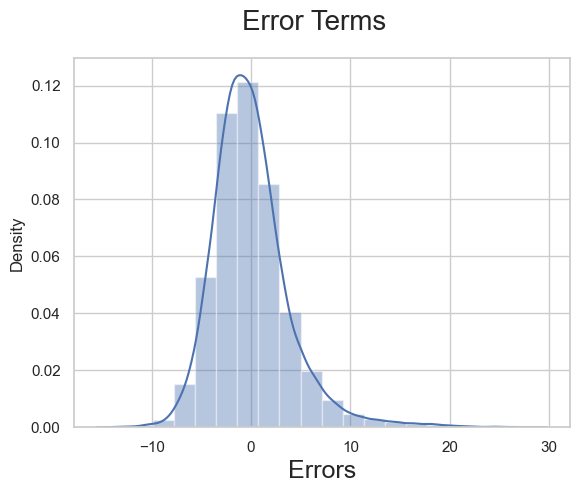

In [147]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residuals = y_test - y_test_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residuals), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()


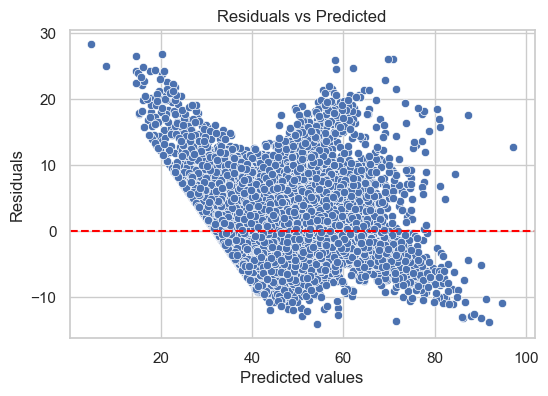

In [148]:
# residuals vs predicted value

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

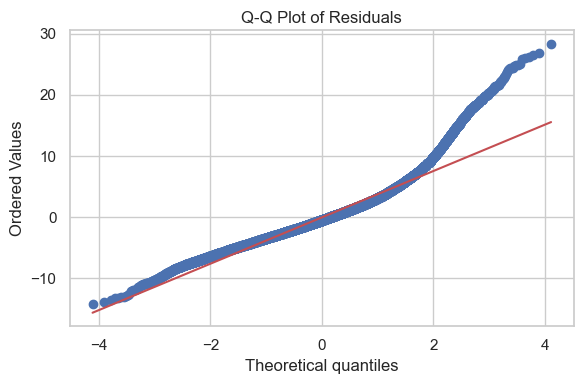

In [149]:
import scipy.stats as stats

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

[Your inferences here:]

[Your inferences here:
Variables - 'total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_outstanding_orders', 'distance', 'created_at_hour', isWeekend' <br>
p value of all variable is 0 , these variables in statistically significant.<br>
coef is positive/negative and close to zero as well. R2 is .817, meaning 81.7% of variance is explained by all variable.<br>
Majority VIF is less than 5, which is excellent<br>
Only 2 VIF is moderate, hence this is an acceptable model. Removing any of these brings down R2 around 40%, hence not removed.<br>
<br>
Overall, the model is well-suited for predicting delivery times in real-world operations and gives dependable results.]

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [150]:
# Compare the scaled vs unscaled features used in the final model
angle_comb_train = 2 * np.pi * combined_train_df['created_hour'] / 24
combined_train_df['hour_sin'] = np.sin(angle_comb_train)
combined_train_df['hour_cos'] = np.cos(angle_comb_train)

combined_train_df.drop(columns=['created_hour'], inplace=True)


In [151]:
# Compare the scaled vs unscaled features used in the final model

# scaled coefficients 
coef = pd.Series(lr.params).drop('const')

scaled_features = ['subtotal', 'num_distinct_items','total_onshift_dashers', 'total_outstanding_orders', 'distance','hour_sin','hour_cos']

# range for scaled features
range_diff = combined_train_df[scaled_features].agg(['min', 'max']).T
range_diff['range'] = range_diff['max'] - range_diff['min']

# unscaled impact
unscaled_impact = coef[scaled_features] * range_diff['range']

final_df = pd.DataFrame({'Feature': coef.index, 'Scaled Coef': coef.values})

# range and unscaled impact
final_df['Range'] = final_df['Feature'].map(range_diff['range'].round(2))
final_df['Unscaled Impact'] = final_df['Feature'].map(unscaled_impact.round(2))

final_df

,Feature,Scaled Coef,Range,Unscaled Impact
0,subtotal,15.357333,26800.00,411576.51
1,num_distinct_items,2.550815,19.00,48.47
2,total_onshift_dashers,-65.820334,175.00,-11518.56
3,total_outstanding_orders,67.916951,289.00,19628.00
4,distance,19.926259,83.52,1664.24
5,isWeekend,1.058467,NaN,NaN
6,hour_sin,4.778533,2.00,9.56
7,hour_cos,3.335483,1.87,6.22


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [152]:
# Analyze the effect of a unit change in a feature, say 'total_items'

fdf = final_df[~final_df['Range'].isna()]

# unit change impact
fdf['Unit_change_impact'] = (fdf['Scaled Coef'] / fdf['Range']).round(5)

fdf[['Feature', 'Scaled Coef', 'Range', 'Unit_change_impact']]

,Feature,Scaled Coef,Range,Unit_change_impact
0,subtotal,15.357333,26800.00,0.00057
1,num_distinct_items,2.550815,19.00,0.13425
2,total_onshift_dashers,-65.820334,175.00,-0.37612
3,total_outstanding_orders,67.916951,289.00,0.23501
4,distance,19.926259,83.52,0.23858
6,hour_sin,4.778533,2.00,2.38927
7,hour_cos,3.335483,1.87,1.78368


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

>**Answer:**
> Yes, created_at_hour and isWeekend are the 2 main categorical variables. Both the variables have p value of 0, and hence are statistically significant.
>created_at_hour has coef of -0.2620, suggesting delivery time reduced in the later hours of the day. <br>
> isWeekend has coef of 1.1794, suggesting delivery time increased over the weekend. 



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> This means 20% of the data will be used for testing, and the remaining 80% will be used for training the model.<br>
Generally speaking 80/20 or 70/30 are considered as good distribution between train and test data



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> From the correlation data, highest correlation is with "distance" variable and is of 0.46 <br>
Longer distances usually lead to longer delivery times, however other variables could have impact too



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
> To identify outliers, I used boxplots to visualize the distribution of each feature and spot extreme values that might distort the model's performance. These outliers typically fall outside the interquartile range or beyond the whiskers of the boxplot. <br>
> To handle these outliers, I applied capping at the 99th percentile. This involved replacing any values above the 99th percentile with the percentile value itself, helping to limit the impact of extreme cases on the model while preserving the overall data structure.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> 1. total_onshift_dashers - Coefficient: -66.13 <br>
> Impact: Strongest influence in reducing delivery time — more dashers available means faster deliveries.<br>
> Statistical Significance: Extremely high (t = -542, p < 0.001) <br>
> 2. total_outstanding_orders - Coefficient: +67.65 <br>
> Impact: Strongest positive influence on delivery time — high workload delays deliveries. <br>
> Statistical Significance: Very high (t = 567.6, p < 0.001)> 
> 3. distance - Coefficient: +19.89 <br>
> Impact: Large and consistent contributor to increased delivery time.<br>
> Statistical Significance: Very high (t = 407, p < 0.001)<br>



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear regression is a supervised learning algorithm used for predicting a continuous numeric value. It models the linear relationship between a dependent variable (target) and one or more independent variables (features). <br>
> Goal of Linear regression is to fit a straight line (in higher dimensions, a hyperplane) through the data such that the predicted values are as close as possible to the actual values. <br>
> y = β0 + β1x (imple Linear Regression (1 feature)) <br> 
> y = β0 + β1x1 +β2x2 +⋯+βnxn (Multiple Linear Regression (n features)) <br><br>
Assumptions of Linear Regression<br>
    Linearity: Relationship between features and target is linear<br>
    Independence: Observations are independent<br>
    Homoscedasticity: Constant variance of residuals<br>
    Normality: Residuals are normally distributed<br>
    No multicollinearity: Independent variables aren't too correlated<br>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Simple Linear Regression: A linear regression model that uses only one independent variable to predict the dependent (target) variable. <br>
> y = β0 + β1x <br>
> e.g. Predicting a person's weight based on height, Predicting student score based on hours studied.<br>
><br>
> Multiple Linear Regression: A linear regression model that uses two or more independent variables to predict the dependent variable.<br>
> y = β0 + β1x1 +β2x2 +⋯+βnxn <br>
> e.g. Predicting house price based on area, number of rooms, and location, Predicting delivery time based on distance, number of items<br>
> <br>
> Simple Linear Regression helps you understand and predict based on one factor. Multiple Linear Regression lets you analyze complex, real-world scenarios with many influencing factors — making it far more common in practice.




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> Cost function measures the performance of a machine learning model for a data set. The function quantifies the error between predicted and expected values and presents that error in the form of a single real number. <br> It is a measure of how far off a linear model’s predictions are from the actual values. The most commonly used cost function in linear regression is the Mean Squared Error (MSE) function. <br>
> In simple terms, it tells you how good/bad your model is — the lower the cost, the better the model. <br>
Hence the goal is to find the values of model parameters for which cost function return as small a number as possible. <br><br>
> Minimize cost functions: <br>
> The most common method is Gradient Descent, which works by iteratively updating the model's coefficients in the direction that reduces the cost function.<br>
> Alternative method is Ordinary Least Squares (OLS), which is used to estimate the coefficients of a linear regression model.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Underfitting occurs when a model is too simple to learn the underlying structure in the data. It fails to capture the trends and relationships between features and the target. <br>
> Overfitting happens when a model is too complex and tries to memorize the training data, including noise and random fluctuations. As a result, it performs extremely well on training data but fails to generalize to new, unseen data. <br><br>
> Underfitting will mean High bias, Poor performance on training data and test data resulting into Model not learning enough to make good predictions <br>
> While Overfitting will mean High variance, Low training error, but high test error resulting into Model memorizing instead of learning from the data.<br><br>
> Generally speaking we should avoid both Underfitting and Overfitting to build models that are accurate, robust, and generalizable.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual plots are powerful diagnostic tools that help assess the validity and quality of a linear regression model. They visually show the differences between actual and predicted values — and help you determine if the assumptions behind linear regression hold true.
<br>

>Histogram or Q-Q Plot (for Normality of Residuals):<br>
>A histogram of residuals shows if they follow a bell-shaped curve (normal distribution). A Q-Q plot compares residuals to a normal distribution; if the points lie on a straight line, the residuals are normal. In our case, the histogram and Q-Q plot show deviations from normality, indicating a slight skew in the residuals.<br>

> Residuals vs Predicted Values (for Homoscedasticity):<br>
>This plot checks if residuals have constant variance. A random scatter around the horizontal axis indicates that the assumption holds. A funnel shape, however, suggests heteroscedasticity (non-constant variance), which violates the assumption. This pattern is observed in our model. <br>

>Residuals vs Predicted Values (for Linearity):<br>
>This plot helps check the linearity assumption. If there's no clear pattern in the residuals, the linearity assumption holds. If residuals form a curve, it suggests that the relationship between predictors and the target is not linear. This is evident in our plot, where we observe a clear pattern, indicating potential non-linearity.<br>